# Import Pandas and SQLite

In [23]:
import sqlite3 as sql
import pandas as pd
import pandas.io.common
import matplotlib.pyplot as plt

In [100]:
#@title Security Gateway Node { run: "auto" }
node = "MI1" #@param ["MI1", "MI2", "AN", "BA1", "BA2", "BG"]
datetime = "2021-04-07" #@param {type:"date"}
path = "https://raw.githubusercontent.com/moronim/repo/main/" + node + "-" + datetime + ".csv"

spc3_data = pd.read_csv(path)

spc3_data.columns = spc3_data.columns.str.replace(" ", "")
spc3_data

,DATE,TIME,FPC,PIC,ENCAP_BYTES,ENCAP_PKTS,DECAP_BYTES,DECAP_PKTS
0,2021-04-07,00:00,FPC0,PIC0:,183265487752,12688945095,142913997,54747412
1,2021-04-07,00:00,FPC0,PIC1:,359440890520,27362909100,281211067,107258519
2,2021-04-07,00:05,FPC0,PIC0:,177564385616,11889208834,138804472,52832664
3,2021-04-07,00:05,FPC0,PIC1:,357500464080,27539121388,279858628,106953403
4,2021-04-07,00:10,FPC0,PIC0:,170414856232,11467926020,132724699,49835809
...,...,...,...,...,...,...,...,...
571,2021-04-07,23:45,FPC0,PIC1:,392519604736,33507253497,314928040,124572069
572,2021-04-07,23:50,FPC0,PIC0:,188970838192,15910550787,152383372,61418126
573,2021-04-07,23:50,FPC0,PIC1:,391703761816,32871770112,312670897,122632807
574,2021-04-07,23:55,FPC0,PIC0:,191292671944,14911399796,152960171,59189426


RangeIndex(start=0, stop=576, step=1)


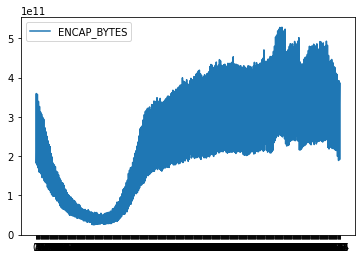

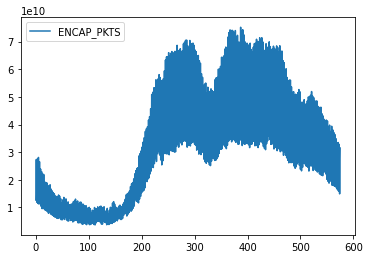

In [114]:
!rm spc3db.db
conn = sql.connect('spc3db.db')
spc3_data.to_sql('spc3db', conn, index=True)
encap_bytes = pd.read_sql('SELECT ENCAP_BYTES FROM spc3db', conn)
time = pd.read_sql('SELECT TIME FROM spc3db', conn)
print(time.index)
encap_pkts = pd.read_sql('SELECT ENCAP_PKTS FROM spc3db', conn)
ax2010 = encap_bytes.plot(y='ENCAP_BYTES', xticks=time.index)
ax2011 = encap_pkts.plot(y='ENCAP_PKTS')